## Here are some codes about how we combine the different models.



In [1]:
import torch
import torch.nn.functional as F  # 激励函数的库
from torchvision import datasets
import torchvision.transforms as transforms
import numpy as np
import pandas as pd
import random
import math
import time
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
num_inputs = 784 
num_outputs = 10 
num_hiddens = 10

# 定义全局变量
n_epochs = 10   # 
batch_size = 60000# 


transform=transforms.Compose([transforms.ToTensor(),
                              ])
 
# 
train_data = datasets.MNIST(root = '/Users/singlexu/Desktop/Artificial Intelligence Concepts/Project 2/DataSet', train = True, download = True, transform = transform)
test_data = datasets.MNIST(root = '/Users/singlexu/Desktop/Artificial Intelligence Concepts/Project 2/DataSet', train = False, download = True, transform = transform)
# 
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, num_workers = 0)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, num_workers = 0)

/Applications/Anaconda/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1631631227379/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
for x,y in train_loader:
    x = x.view(-1, 784)
    pca = PCA(0.9)
#     pca.fit(x)
#     x_train_reduction = pca.transform(x)
    x_train_reduction = pca.fit_transform(x)
    
    print(x_train_reduction.shape)


(60000, 87)


In [6]:
for x,y in test_loader:
    x = x.view(-1, 784)
#     pca = PCA(87)
#     pca.fit(x)
    x_train_reduction = pca.transform(x)
#     print(x_train_reduction.shape)
    test_set = torch.tensor(np.array(x_train_reduction, dtype='float32'))
    test_target_set = y

In [7]:
def Test(best_weights):
#     print('------ Test Start -----')
    
    Acc1 = []
    
    W_1, b_1, W_2, b_2 = Chromosome_to_Weights_Bias(best_weights)


    prediction1 = NN(test_set, W_1, b_1, W_2, b_2)
    error1 = prediction1 - test_target_set

    for item in error1:
        if item == 0:
            Acc1.append(1)

    return sum(Acc1)/10000

In [8]:
def NN(X, W_1, b_1, W_2, b_2):
    
    
    V1 = torch.mm(X, W_1) + b_1
    Y1 = F.relu(V1)
    V2 = torch.mm(Y1, W_2) + b_2
    Y = torch.argmax(F.softmax(V2, dim=1), dim = 1)
    
    return Y

In [9]:
def Chromosome_to_Weights_Bias(chromosome):

    W_1 = chromosome[0:8700]
#     print('WWW', W_1.reshape(784,30).shape)
    W_1 = np.array(W_1, dtype='float32')
    W_1 = torch.from_numpy(W_1)
    W_1 = W_1.view(87, 100)
    
    b_1 = chromosome[8700:8800]
#     print('WWW', W_1.reshape(784,30).shape)
    b_1 = np.array(b_1, dtype='float32')
    b_1 = torch.from_numpy(b_1)
    b_1 = b_1.view(100)
    
    W_2 = chromosome[8800:9800]
    W_2 = np.array(W_2, dtype='float32')
    W_2 = torch.from_numpy(W_2)
    W_2 = W_2.view(100, 10)
    
    b_2 = chromosome[9800:]
    b_2 = np.array(b_2, dtype='float32')
    b_2 = torch.from_numpy(b_2)
    b_2 = b_2.view(10)
    
    return W_1, b_1, W_2, b_2

### Original Model 

In [10]:
df1 =  pd.read_table("./One/00000-10000-8217.txt", sep='|', header=None)
df1 = df1[2]
df2 =  pd.read_table("./One/10000-20000-8421.txt", sep='|', header=None)
df2 = df2[2]
df3 =  pd.read_table("./One/20000-30000-8013.txt", sep='|', header=None)
df3 = df3[2]
df4 =  pd.read_table("./One/30000-40000-8078.txt", sep='|', header=None)
df4 = df4[2]
df5 =  pd.read_table("./One/40000-50000-8074.txt", sep='|', header=None)
df5 = df5[2]
df6 =  pd.read_table("./One/50000-60000-7934.txt", sep='|', header=None)
df6 = df6[2]

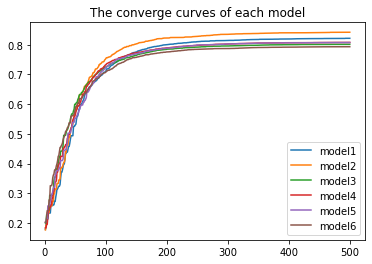

In [11]:

plt.plot(range(1,501),list(df1), label = 'model1')
plt.plot(range(1,501),list(df2), label = 'model2')
plt.plot(range(1,501),list(df3), label = 'model3')
plt.plot(range(1,501),list(df4), label = 'model4')
plt.plot(range(1,501),list(df5), label = 'model5')
plt.plot(range(1,501),list(df6), label = 'model6')
plt.legend()
plt.title('The converge curves of each model')
plt.savefig('ModelCombination_curves.png', dpi=600)
plt.show()

In [12]:
w1 = pd.read_csv('./One/00000-10000-8217-one-100.csv')
w2 = pd.read_csv('./One/10000-20000-8421-one-100.csv')
w3 = pd.read_csv('./One/20000-30000-8013-one-100.csv')
w4 = pd.read_csv('./One/30000-40000-8078-one-100.csv')
w5 = pd.read_csv('./One/40000-50000-8074-one-100.csv')
w6 = pd.read_csv('./One/50000-60000-7934-one-100.csv')

In [13]:
w1 = np.array(w1['0'])
w2 = np.array(w2['0'])
w3 = np.array(w3['0'])
w4 = np.array(w4['0'])
w5 = np.array(w5['0'])
w6 = np.array(w6['0'])

In [14]:
print('Model 1 accuracy in train set and test set is %s and %s'%(0.8217,Test(w1)))
print('Model 2 accuracy in train set and test set is %s and %s'%(0.8421,Test(w2)))
print('Model 3 accuracy in train set and test set is %s and %s'%(0.8013,Test(w3)))
print('Model 4 accuracy in train set and test set is %s and %s'%(0.8078,Test(w4)))
print('Model 5 accuracy in train set and test set is %s and %s'%(0.8074,Test(w5)))
print('Model 6 accuracy in train set and test set is %s and %s'%(0.7934,Test(w6)))

Model 1 accuracy in train set and test set is 0.8217 and 0.7924
Model 2 accuracy in train set and test set is 0.8421 and 0.8222
Model 3 accuracy in train set and test set is 0.8013 and 0.774
Model 4 accuracy in train set and test set is 0.8078 and 0.7985
Model 5 accuracy in train set and test set is 0.8074 and 0.7879
Model 6 accuracy in train set and test set is 0.7934 and 0.7527


In [15]:
def Getresult(best_weights):
#     print('------ Test Start -----')
    
    Acc1 = []
    
    W_1, b_1, W_2, b_2 = Chromosome_to_Weights_Bias(best_weights)


    prediction1 = NN(test_set, W_1, b_1, W_2, b_2)
#     error1 = prediction1 - test_target_set

    return prediction1

In [16]:
m1_p1 = Getresult(w1)
m2_p1 = Getresult(w2)
m3_p1 = Getresult(w3)
m4_p1 = Getresult(w4)
m5_p1 = Getresult(w5)
m6_p1 = Getresult(w6)

In [22]:
final_result = []

for i in range(len(m1_p1)):
    judge = []
    judge.append(m2_p1[i].tolist())
    judge.append(m1_p1[i].tolist())
    judge.append(m3_p1[i].tolist())
    judge.append(m4_p1[i].tolist())
    judge.append(m5_p1[i].tolist())
    judge.append(m6_p1[i].tolist())    
    maxlabel = max(judge,key=judge.count)
    final_result.append(maxlabel)

In [23]:
final_result = torch.tensor(final_result)
Acc11 = []
error1 = final_result - test_target_set

for item in error1:
    if item == 0:
        Acc11.append(1)
        
print(sum(Acc11)/10000)

0.8679


In [24]:
HashMap = {}
xxx = test_target_set.tolist()
for i in range(10000):
    if error1[i]!=0:
        if xxx[i] not in HashMap:
            HashMap[xxx[i]] = 1
        else:
            HashMap[xxx[i]] += 1
print(HashMap)

{6: 87, 5: 292, 3: 135, 9: 175, 4: 95, 2: 163, 1: 36, 7: 113, 8: 185, 0: 40}


In [25]:
Number = {}

for i in range(10000):
    if xxx[i] not in Number:
        Number[xxx[i]] = 1
    else:
        Number[xxx[i]] += 1
        
print(Number)

{7: 1028, 2: 1032, 1: 1135, 0: 980, 4: 982, 9: 1009, 5: 892, 6: 958, 3: 1010, 8: 974}


In [26]:
Sum = 0
for key in HashMap:
    print('%s:%s,%s'%(key,HashMap[key], 1-(HashMap[key]/ Number[key])))
    Sum += HashMap[key]
    
print(Sum)

6:87,0.9091858037578289
5:292,0.6726457399103138
3:135,0.8663366336633663
9:175,0.8265609514370664
4:95,0.9032586558044806
2:163,0.8420542635658914
1:36,0.9682819383259912
7:113,0.8900778210116731
8:185,0.8100616016427105
0:40,0.9591836734693877
1321


### Single layer with 150 hidden nodes

In [27]:
def for_150_Chromosome_to_Weights_Bias(chromosome):

    W_1 = chromosome[0:13050]
#     print('WWW', W_1.reshape(784,30).shape)
    W_1 = np.array(W_1, dtype='float32')
    W_1 = torch.from_numpy(W_1)
    W_1 = W_1.view(87, 150)
    
    b_1 = chromosome[13050:13200]
#     print('WWW', W_1.reshape(784,30).shape)
    b_1 = np.array(b_1, dtype='float32')
    b_1 = torch.from_numpy(b_1)
    b_1 = b_1.view(150)
    
    W_2 = chromosome[13200:14700]
    W_2 = np.array(W_2, dtype='float32')
    W_2 = torch.from_numpy(W_2)
    W_2 = W_2.view(150, 10)
    
    b_2 = chromosome[14700:14710]
    b_2 = np.array(b_2, dtype='float32')
    b_2 = torch.from_numpy(b_2)
    b_2 = b_2.view(10)
    
    return W_1, b_1, W_2, b_2

def for_150_Getresult(best_weights):
#     print('------ Test Start -----')
    
    Acc1 = []
    
    W_1, b_1, W_2, b_2 = for_150_Chromosome_to_Weights_Bias(best_weights)


    prediction1 = NN(test_set, W_1, b_1, W_2, b_2)
#     error1 = prediction1 - test_target_set

    return prediction1

In [28]:
df1 =  pd.read_table("./One-150/1.txt", sep='|', header=None)
df1 = df1[2]
df2 =  pd.read_table("./One-150/2.txt", sep='|', header=None)
df2 = df2[2]
df3 =  pd.read_table("./One-150/3.txt", sep='|', header=None)
df3 = df3[2]
df4 =  pd.read_table("./One-150/4.txt", sep='|', header=None)
df4 = df4[2]
df5 =  pd.read_table("./One-150/5.txt", sep='|', header=None)
df5 = df5[2]
df6 =  pd.read_table("./One-150/6.txt", sep='|', header=None)
df6 = df6[2]

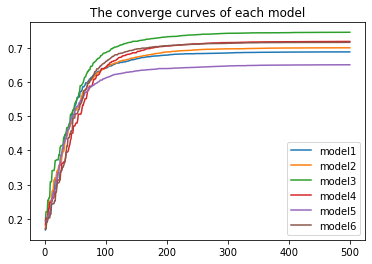

In [29]:

plt.plot(range(1,501),list(df1), label = 'model1')
plt.plot(range(1,501),list(df2), label = 'model2')
plt.plot(range(1,501),list(df3), label = 'model3')
plt.plot(range(1,501),list(df4), label = 'model4')
plt.plot(range(1,501),list(df5), label = 'model5')
plt.plot(range(1,501),list(df6), label = 'model6')
plt.legend()
plt.title('The converge curves of each model')
plt.savefig('singlewith150.png', dpi=600)
plt.show()

In [30]:
w1 = pd.read_csv('./One-150/1.csv')
w2 = pd.read_csv('./One-150/2.csv')
w3 = pd.read_csv('./One-150/3.csv')
w4 = pd.read_csv('./One-150/4.csv')
w5 = pd.read_csv('./One-150/5.csv')
w6 = pd.read_csv('./One-150/6.csv')
w1 = np.array(w1['0'])
w2 = np.array(w2['0'])
w3 = np.array(w3['0'])
w4 = np.array(w4['0'])
w5 = np.array(w5['0'])
w6 = np.array(w6['0'])

In [31]:

m1_p = for_150_Getresult(w1)
m2_p = for_150_Getresult(w2)
m3_p = for_150_Getresult(w3)
m4_p = for_150_Getresult(w4)
m5_p = for_150_Getresult(w5)
m6_p = for_150_Getresult(w6)

In [32]:
final_result = []

for i in range(len(m1_p)):
    judge = []
    judge.append(m2_p[i].tolist())
    judge.append(m1_p[i].tolist())
    judge.append(m3_p[i].tolist())
    judge.append(m4_p[i].tolist())
    judge.append(m5_p[i].tolist())
    judge.append(m6_p[i].tolist())    
    maxlabel = max(judge,key=judge.count)
    final_result.append(maxlabel)

In [33]:
final_result = torch.tensor(final_result)
Acc11 = []
error1 = final_result - test_target_set

for item in error1:
    if item == 0:
        Acc11.append(1)
        
print(sum(Acc11)/10000)

0.7964


### Two hidden layers

In [34]:
def twoNN(X, W_1, b_1, W_2, b_2, W_3, b_3):
    V1 = torch.mm(X, W_1) + b_1
    Y1 = F.relu(V1)
    V2 = torch.mm(Y1, W_2) + b_2
    Y2 = F.relu(V2)
    V3 = torch.mm(Y2, W_3) + b_3

    Y = torch.argmax(F.softmax(V3, dim=1), dim = 1)
    
    return Y

def twoChromosome_to_Weights_Bias(chromosome):

    W_1 = chromosome[0:4350]
#     print('WWW', W_1.reshape(784,30).shape)
    W_1 = np.array(W_1, dtype='float32')
    W_1 = torch.from_numpy(W_1)
    W_1 = W_1.view(87, 50)
    
    b_1 = chromosome[4350:4400]
#     print('WWW', W_1.reshape(784,30).shape)
    b_1 = np.array(b_1, dtype='float32')
    b_1 = torch.from_numpy(b_1)
    b_1 = b_1.view(50)
    
    W_2 = chromosome[4400:6900]
    W_2 = np.array(W_2, dtype='float32')
    W_2 = torch.from_numpy(W_2)
    W_2 = W_2.view(50, 50)
    
    b_2 = chromosome[6900:6950]
    b_2 = np.array(b_2, dtype='float32')
    b_2 = torch.from_numpy(b_2)
    b_2 = b_2.view(50)

    W_3 = chromosome[6950:7450]
    W_3 = np.array(W_3, dtype='float32')
    W_3 = torch.from_numpy(W_3)
    W_3 = W_3.view(50, 10)
    
    b_3 = chromosome[7450:]
    b_3 = np.array(b_3, dtype='float32')
    b_3 = torch.from_numpy(b_3)
    b_3 = b_3.view(10)
    
    return W_1, b_1, W_2, b_2, W_3, b_3

def twoGetresult(best_weights):
    
    W_1, b_1, W_2, b_2, W_3, b_3 = twoChromosome_to_Weights_Bias(best_weights)


    prediction1 = twoNN(test_set, W_1, b_1, W_2, b_2, W_3, b_3)
    
    return prediction1

In [35]:
df1 =  pd.read_table("./Two/2-1.txt", sep='|', header=None)
df1 = df1[2]
df2 =  pd.read_table("./Two/2-2.txt", sep='|', header=None)
df2 = df2[2]
df3 =  pd.read_table("./Two/2-3.txt", sep='|', header=None)
df3 = df3[2]
df4 =  pd.read_table("./Two/2-4.txt", sep='|', header=None)
df4 = df4[2]
df5 =  pd.read_table("./Two/2-5.txt", sep='|', header=None)
df5 = df5[2]
df6 =  pd.read_table("./Two/2-6.txt", sep='|', header=None)
df6 = df6[2]

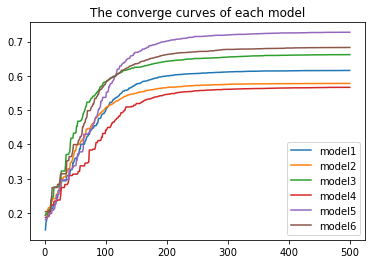

In [36]:
plt.plot(range(1,501),list(df1), label = 'model1')
plt.plot(range(1,501),list(df2), label = 'model2')
plt.plot(range(1,501),list(df3), label = 'model3')
plt.plot(range(1,501),list(df4), label = 'model4')
plt.plot(range(1,501),list(df5), label = 'model5')
plt.plot(range(1,501),list(df6), label = 'model6')
plt.legend()
plt.title('The converge curves of each model')
plt.savefig('Twolayers.png', dpi=600)
plt.show()

In [37]:
w1 = pd.read_csv("./Two/2-1.csv")
w2 = pd.read_csv("./Two/2-2.csv")
w3 = pd.read_csv("./Two/2-3.csv")
w4 = pd.read_csv("./Two/2-4.csv")
w5 = pd.read_csv("./Two/2-5.csv")
w6 = pd.read_csv("./Two/2-6.csv")
w1 = np.array(w1['0'])
w2 = np.array(w2['0'])
w3 = np.array(w3['0'])
w4 = np.array(w4['0'])
w5 = np.array(w5['0'])
w6 = np.array(w6['0'])

In [38]:
m1_p = twoGetresult(w1)
m2_p = twoGetresult(w2)
m3_p = twoGetresult(w3)
m4_p = twoGetresult(w4)
m5_p = twoGetresult(w5)
m6_p = twoGetresult(w6)

In [39]:
final_result = []

for i in range(len(m1_p)):
    judge = []
    judge.append(m2_p[i].tolist())
    judge.append(m1_p[i].tolist())
    judge.append(m3_p[i].tolist())
    judge.append(m4_p[i].tolist())
    judge.append(m5_p[i].tolist())
    judge.append(m6_p[i].tolist())    
    maxlabel = max(judge,key=judge.count)
    final_result.append(maxlabel)

In [40]:
final_result = torch.tensor(final_result)
Acc11 = []
error1 = final_result - test_target_set

for item in error1:
    if item == 0:
        Acc11.append(1)
        
print(sum(Acc11)/10000)

0.7673


### GENE in [-100, 100]

In [41]:
CT = pd.read_table("./One-GA-100/GA-100.txt", sep='|', header=None)

In [42]:
CT = CT[2]

In [43]:
df1 = CT[:500]
df2 = CT[500:1000]
df3 = CT[1000:1500]
df4 = CT[1500:2000]
df5 = CT[2000:2500]
df6 = CT[2500:]

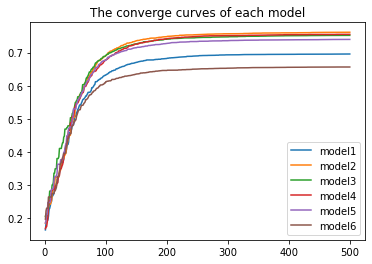

In [44]:
plt.plot(range(1,501),list(df1), label = 'model1')
plt.plot(range(1,501),list(df2), label = 'model2')
plt.plot(range(1,501),list(df3), label = 'model3')
plt.plot(range(1,501),list(df4), label = 'model4')
plt.plot(range(1,501),list(df5), label = 'model5')
plt.plot(range(1,501),list(df6), label = 'model6')
plt.legend()
plt.title('The converge curves of each model')
plt.savefig('C2-100', dpi=600)
plt.show()

In [45]:
w1 = pd.read_csv("./One-GA-100/0-10000.csv")
w2 = pd.read_csv("./One-GA-100/10000-20000.csv")
w3 = pd.read_csv("./One-GA-100/20000-30000.csv")
w4 = pd.read_csv("./One-GA-100/30000-40000.csv")
w5 = pd.read_csv("./One-GA-100/40000-50000.csv")
w6 = pd.read_csv("./One-GA-100/50000-60000.csv")
w1 = np.array(w1['0'])
w2 = np.array(w2['0'])
w3 = np.array(w3['0'])
w4 = np.array(w4['0'])
w5 = np.array(w5['0'])
w6 = np.array(w6['0'])

In [46]:
m1_p2 = Getresult(w1)
m2_p2 = Getresult(w2)
m3_p2 = Getresult(w3)
m4_p2 = Getresult(w4)
m5_p2 = Getresult(w5)
m6_p2 = Getresult(w6)

In [47]:
final_result = []

for i in range(len(m1_p)):
    judge = []
    judge.append(m2_p2[i].tolist())
    judge.append(m1_p2[i].tolist())
    judge.append(m3_p2[i].tolist())
    judge.append(m4_p2[i].tolist())
    judge.append(m5_p2[i].tolist())
    judge.append(m6_p2[i].tolist())    
    maxlabel = max(judge,key=judge.count)
    final_result.append(maxlabel)

In [48]:
final_result = torch.tensor(final_result)
Acc11 = []
error1 = final_result - test_target_set

for item in error1:
    if item == 0:
        Acc11.append(1)
        
print(sum(Acc11)/10000)

0.8412


### Combine this model with our original model.

In [49]:
final_result = []

for i in range(len(m1_p)):
    judge = []
    judge.append(m2_p1[i].tolist())
    judge.append(m1_p1[i].tolist())
    judge.append(m3_p1[i].tolist())
    judge.append(m4_p1[i].tolist())
    judge.append(m5_p1[i].tolist())
    judge.append(m6_p1[i].tolist()) 
    judge.append(m2_p2[i].tolist())
    judge.append(m1_p2[i].tolist())
    judge.append(m3_p2[i].tolist())
    judge.append(m4_p2[i].tolist())
    judge.append(m5_p2[i].tolist())
    judge.append(m6_p2[i].tolist())    
    maxlabel = max(judge,key=judge.count)
    final_result.append(maxlabel)

In [50]:
final_result = torch.tensor(final_result)
Acc11 = []
error1 = final_result - test_target_set

for item in error1:
    if item == 0:
        Acc11.append(1)
        
print(sum(Acc11)/10000)

0.8734


### GENE in [- 5, 5]

In [51]:
CT = pd.read_table("./One-GA-5/one-5.txt", sep='|', header=None)
CT = CT[2]
df1 = CT[:500]
df2 = CT[500:1000]
df3 = CT[1000:1500]
df4 = CT[1500:2000]
df5 = CT[2000:2500]
df6 = CT[2500:]

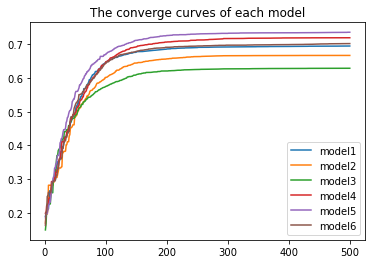

In [52]:
plt.plot(range(1,501),list(df1), label = 'model1')
plt.plot(range(1,501),list(df2), label = 'model2')
plt.plot(range(1,501),list(df3), label = 'model3')
plt.plot(range(1,501),list(df4), label = 'model4')
plt.plot(range(1,501),list(df5), label = 'model5')
plt.plot(range(1,501),list(df6), label = 'model6')
plt.legend()
plt.title('The converge curves of each model')
plt.savefig('C2-5.png', dpi=600)
plt.show()

In [53]:
w1 = pd.read_csv("./One-GA-5/0-10000.csv")
w2 = pd.read_csv("./One-GA-5/10000-20000.csv")
w3 = pd.read_csv("./One-GA-5/20000-30000.csv")
w4 = pd.read_csv("./One-GA-5/30000-40000.csv")
w5 = pd.read_csv("./One-GA-5/40000-50000.csv")
w6 = pd.read_csv("./One-GA-5/50000-60000.csv")
w1 = np.array(w1['0'])
w2 = np.array(w2['0'])
w3 = np.array(w3['0'])
w4 = np.array(w4['0'])
w5 = np.array(w5['0'])
w6 = np.array(w6['0'])

In [54]:
m1_p = Getresult(w1)
m2_p = Getresult(w2)
m3_p = Getresult(w3)
m4_p = Getresult(w4)
m5_p = Getresult(w5)
m6_p = Getresult(w6)

In [55]:
final_result = []

for i in range(len(m1_p)):
    judge = []
    judge.append(m2_p[i].tolist())
    judge.append(m1_p[i].tolist())
    judge.append(m3_p[i].tolist())
    judge.append(m4_p[i].tolist())
    judge.append(m5_p[i].tolist())
    judge.append(m6_p[i].tolist())    
    maxlabel = max(judge,key=judge.count)
    final_result.append(maxlabel)

In [56]:
final_result = torch.tensor(final_result)
Acc11 = []
error1 = final_result - test_target_set

for item in error1:
    if item == 0:
        Acc11.append(1)
        
print(sum(Acc11)/10000)

0.7742
